In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("./../DataSets/exams.csv")

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,83,88,86
1,female,group D,some college,free/reduced,none,84,82,82
2,female,group E,associate's degree,free/reduced,completed,74,83,83
3,male,group C,high school,standard,none,59,51,46
4,male,group C,some high school,standard,none,73,68,67
5,female,group C,associate's degree,standard,none,65,57,64
6,male,group A,bachelor's degree,standard,completed,65,59,62
7,male,group E,some college,standard,none,100,92,84
8,male,group D,some high school,standard,none,73,51,52
9,male,group E,bachelor's degree,standard,none,100,100,92


In [5]:
# scores can be in different range

In [6]:
# match can be between 0 to 100, reading can be 0 to 50 and so on

In [7]:
#standardize scores to bring it to uniformed range

In [8]:
math = df['math score'].mean()
read = df['reading score'].mean()
write = df['writing score'].mean()

print(math, read, write)

66.86 69.99 68.94


In [9]:
from sklearn import preprocessing

df[['math score']] = preprocessing.scale(df[['math score']])
df[['reading score']] = preprocessing.scale(df[['reading score']])
df[['writing score']] = preprocessing.scale(df[['writing score']])

In [10]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,1.089545,1.279689,1.117455
1,female,group D,some college,free/reduced,none,1.157051,0.853363,0.855449
2,female,group E,associate's degree,free/reduced,completed,0.481992,0.924417,0.920950
3,male,group C,high school,standard,none,-0.530596,-1.349322,-1.502603
4,male,group C,some high school,standard,none,0.414486,-0.141398,-0.127073
5,female,group C,associate's degree,standard,none,-0.125561,-0.922996,-0.323577
6,male,group A,bachelor's degree,standard,completed,-0.125561,-0.780887,-0.454580
7,male,group E,some college,standard,none,2.237145,1.563907,0.986452
8,male,group D,some high school,standard,none,0.414486,-1.349322,-1.109594
9,male,group E,bachelor's degree,standard,none,2.237145,2.132341,1.510463


In [15]:
# ENCODING Catergorical data as numbers

In [ ]:
#Label encoding column, converting categorical data to 0,1,2.....

In [13]:
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))

In [20]:
#One hot encoding

In [18]:
df = pd.get_dummies(df, columns=['race/ethnicity'])

In [19]:
df.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,some college,standard,none,1.089545,1.279689,1.117455,False,False,True,False,False
1,0,some college,free/reduced,none,1.157051,0.853363,0.855449,False,False,False,True,False
2,0,associate's degree,free/reduced,completed,0.481992,0.924417,0.920950,False,False,False,False,True
3,1,high school,standard,none,-0.530596,-1.349322,-1.502603,False,False,True,False,False
4,1,some high school,standard,none,0.414486,-0.141398,-0.127073,False,False,True,False,False


In [ ]:
# Count vectors, to repesent text in numerical form.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
corpus = ['This is the first document.', 'This is the second document.', 'Third document. Document number three', 'Number four. To repeat, number four']

In [39]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)

In [40]:
# each word is represented by id, and its frerquency is stored
print(bag_of_words)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 0)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 0)	1
  (1, 6)	1
  (2, 0)	2
  (2, 8)	1
  (2, 4)	1
  (2, 10)	1
  (3, 4)	2
  (3, 2)	2
  (3, 11)	1
  (3, 5)	1


In [28]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [41]:
# each document is represented by all words in the corpus,along with its frequencies.
pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,1,1,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0
3,0,0,2,0,2,1,0,0,0,0,0,1


In [33]:
#tf idf vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)

In [36]:
# each word gets score
print(bag_of_words)

  (0, 0)	0.3528554929793508
  (0, 1)	0.5528163151092931
  (0, 7)	0.43584673254990375
  (0, 3)	0.43584673254990375
  (0, 9)	0.43584673254990375
  (1, 6)	0.5528163151092931
  (1, 0)	0.3528554929793508
  (1, 7)	0.43584673254990375
  (1, 3)	0.43584673254990375
  (1, 9)	0.43584673254990375
  (2, 10)	0.4850008395708102
  (2, 4)	0.3823802326982809
  (2, 8)	0.4850008395708102
  (2, 0)	0.6191395067937654
  (3, 5)	0.3432724906138499
  (3, 11)	0.3432724906138499
  (3, 2)	0.6865449812276998
  (3, 4)	0.5412799489419371


In [37]:
# each document is represented by all words in the corpus,along with its scores.
pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,0.352855,0.552816,0.000000,0.435847,0.00000,0.000000,0.000000,0.435847,0.000000,0.435847,0.000000,0.000000
1,0.352855,0.000000,0.000000,0.435847,0.00000,0.000000,0.552816,0.435847,0.000000,0.435847,0.000000,0.000000
2,0.619140,0.000000,0.000000,0.000000,0.38238,0.000000,0.000000,0.000000,0.485001,0.000000,0.485001,0.000000
3,0.000000,0.000000,0.686545,0.000000,0.54128,0.343272,0.000000,0.000000,0.000000,0.000000,0.000000,0.343272


In [42]:
!pip install opencv-python 

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 222.6 kB/s eta 0:02:54
   ---------------------------------------- 0.0/38.6 MB 281.8 kB/s eta 0:02:17
   ---------------------------------------- 0.1/38.6 MB 722.1 kB/s eta 0:00:54
   ---------------------------------------- 0.2/38.6 MB 807.1 kB/s eta 0:00:48
   ---------------------------------------- 0.3/38.6 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.6 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.4/38.6 MB 1.1 MB/s eta 0:00:34
    --------------------------------------- 0.6/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.7/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.9/38.6 MB 1.8 MB/s eta 0:00:21
   - -------------------------------------- 1.1/38.6 MB 2.0 MB/s eta 0:00:20
   - 

In [47]:
import cv2
imagePath = './../DataSets/Temp.jpg'
image = cv2.imread(imagePath)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

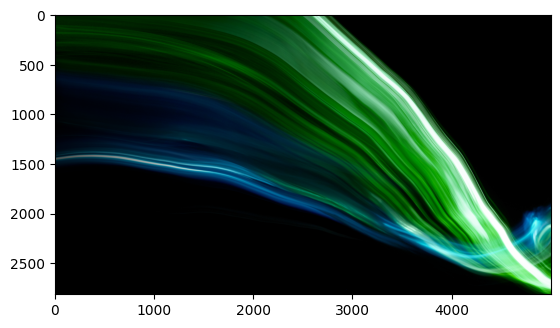

In [49]:
plt.imshow(image)

In [50]:
image.shape

(2814, 5000, 3)

In [51]:
image

array([[[  0,  34,   0],
        [  0,  33,   0],
        [  2,  38,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,  36,   2],
        [  0,  33,   0],
        [  0,  33,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,  34,   0],
        [  0,  35,   0],
        [  1,  34,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  8,   8,   8],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 14, 127,   0],
        [ 18, 126,   0],
        [ 10, 125,   0]],

       [[  8,   8,   8],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 15, 132,   0],
        [ 13, 129,   0],
        [ 16, 126,   0]],

       [[  8,   8,   8],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 27, 141,   4],
        [ 19, 134,   1],
        [ 13, 125,   1]]

In [52]:
image_grayscale = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

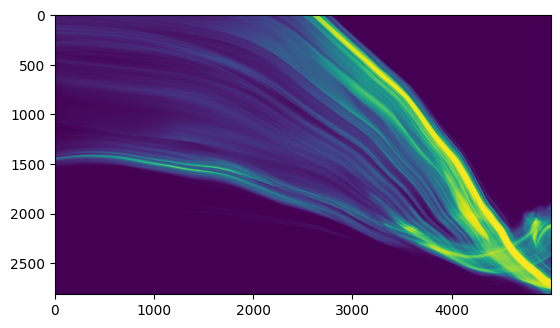

In [53]:
plt.imshow(image_grayscale)